https://www.clarin.com/ciudades/departamentos-chicos_0_rkflu6AuPme.html

# Tendencia o crisis habitacional en Capital Federal:

Si bien nuestro dataset es acotado, y todas las conclusiones que podamos abordar a partir del estudio del mismo parten de una muestra muy reducida, podremos aunque sea verificar si en el listado de publicaciones de properati se ve o no reflejado (y en qué medida) la situación planteada por la noticia adjunta

## ¿La cantidad de publicaciones de casas de 30 metros cuadrados o menos va en alza?
## ¿Cuál es el porcentaje de publicaciones de casas por ambientes?


In [2]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Carga de datos 2017
filenames_2017 = ['properties/properati-AR-2017-01-01-properties-sell.csv',
                 'properties/properati-AR-2017-02-01-properties-sell.csv',
                 'properties/properati-AR-2017-03-01-properties-sell.csv',
                 'properties/properati-AR-2017-04-01-properties-sell.csv',
                 'properties/properati-AR-2017-05-01-properties-sell.csv',
                 'properties/properati-AR-2017-06-01-properties-sell.csv',
                 'properties/properati-AR-2017-07-01-properties-sell.csv']

dataframes_2017 = []
for filename in filenames_2017:
    dataframes_2017.append(pd.read_csv(filename))
    
data_2017 = pd.DataFrame()
for dataframe in dataframes_2017:
    data_2017 = pd.concat([data_2017, dataframe]).drop_duplicates().reset_index(drop=True)
    
#Carga de datos 2016
filenames_2016 = ['properties/properati-AR-2016-01-01-properties-sell.csv', 
            'properties/properati-AR-2016-02-01-properties-sell.csv',
            'properties/properati-AR-2016-03-01-properties-sell.csv',
            'properties/properati-AR-2016-04-01-properties-sell.csv',
            'properties/properati-AR-2016-05-01-properties-sell.csv',
            'properties/properati-AR-2016-06-01-properties-sell.csv',
            'properties/properati-AR-2016-07-01-properties-sell.csv',
            'properties/properati-AR-2016-08-01-properties-sell.csv',
            'properties/properati-AR-2016-09-01-properties-sell.csv',
            'properties/properati-AR-2016-10-01-properties-sell.csv',
            'properties/properati-AR-2016-11-01-properties-sell.csv',
            'properties/properati-AR-2016-12-01-properties-sell.csv']

dataframes_2016 = []
for filename in filenames_2016:
    dataframes_2016.append(pd.read_csv(filename))

data_2016 = pd.DataFrame()
for dataframe in dataframes_2016:
    data_2016 = pd.concat([data_2016, dataframe]).drop_duplicates().reset_index(drop=True)

#Primer y segundo semestre de 2016
psem_2016 = pd.DataFrame()
for x in range(0,6):
    psem_2016 = pd.concat([psem_2016, dataframes_2016[x]]).drop_duplicates().reset_index(drop=True)
    
ssem_2016 = pd.DataFrame()
for x in range(6,12):
    ssem_2016 = pd.concat([ssem_2016, dataframes_2016[x]]).drop_duplicates().reset_index(drop=True)
    
#Primer y Segundo Semestre de 2015
psem_2015 = pd.read_csv('properties/properati-AR-2015-06-01-properties-sell-six_months.csv')
ssem_2015 = pd.read_csv('properties/properati-AR-2015-12-01-properties-sell-six_months.csv')
#Primer y Segundo Semestre de 2014
psem_2014 = pd.read_csv('properties/properati-AR-2014-07-01-properties-sell.csv')
ssem_2014 = pd.read_csv('properties/properati-AR-2015-01-01-properties-sell-six_months.csv')

dataset = pd.concat([data_2017, data_2016, psem_2015, ssem_2015, psem_2014, ssem_2014]).drop_duplicates('properati_url').reset_index(drop=True)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340843 entries, 0 to 340842
Data columns (total 28 columns):
country_name                  284004 non-null object
created_on                    340843 non-null object
currency                      285528 non-null object
description                   283987 non-null object
expenses                      24548 non-null float64
floor                         46468 non-null float64
geonames_id                   290946 non-null float64
id                            284004 non-null object
image_thumbnail               333992 non-null object
lat                           274848 non-null float64
lat-lon                       274848 non-null object
lon                           274848 non-null float64
operation                     340843 non-null object
place_name                    340804 non-null object
place_with_parent_names       340843 non-null object
price                         302565 non-null float64
price_aprox_local_currency    302563 

In [5]:
dataset_capital = dataset
dataset_capital.dropna(subset=['state_name'], inplace=True)
dataset_capital = dataset_capital.loc[dataset_capital.state_name.str.contains('Capital Federal'),:]
dataset_capital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73464 entries, 1 to 340838
Data columns (total 28 columns):
country_name                  73464 non-null object
created_on                    73464 non-null object
currency                      67953 non-null object
description                   73462 non-null object
expenses                      13915 non-null float64
floor                         15765 non-null float64
geonames_id                   70387 non-null float64
id                            73464 non-null object
image_thumbnail               73135 non-null object
lat                           67383 non-null float64
lat-lon                       67383 non-null object
lon                           67383 non-null float64
operation                     73464 non-null object
place_name                    73464 non-null object
place_with_parent_names       73464 non-null object
price                         70034 non-null float64
price_aprox_local_currency    70034 non-null float64

In [6]:
dataset_capital['place_name'].values[1]

'Flores'

In [7]:
import matplotlib.patches as mpatches

/home/nicolas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


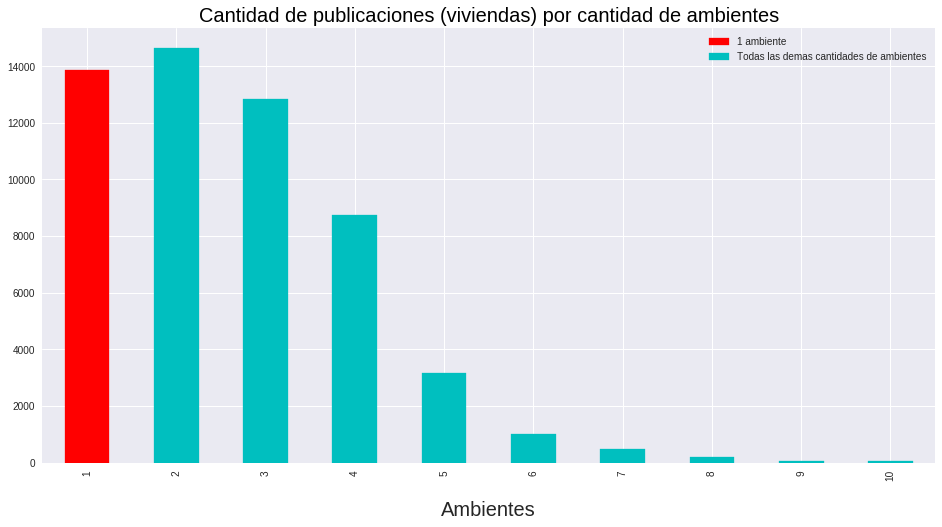

In [8]:
# En este gráfico se puede colorear la columna de 1 ambiente (que es la que buscamos estudiar)
# En primer lugar evalúo la cantidad de publicaciones (que no son tiendas comerciales) según 
#la cantidad de ambientes (rooms)
# Vemos que la mayor cantidad de viviendas publicadas corresponden a 2 y 3 ambientes

dataset_capital.dropna(subset=['property_type', 'rooms'], inplace=True)
dataset_amb = dataset_capital.loc[(~dataset_capital.property_type.str.contains('store')) & (dataset_capital.rooms<11) &\
            (dataset_capital.rooms > 0),['rooms', 'state_name']].groupby('rooms').agg([np.size])

dataset_amb = pd.DataFrame(dataset_amb.to_records())
dataset_amb.columns=['rooms','size']
dataset_amb

dataset_amb = pd.pivot_table(dataset_amb, values='size', index='rooms')

f = plt.figure()
ax = dataset_amb.plot(kind='bar', figsize=(16,8), ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
ax.set_title('Cantidad de publicaciones (viviendas) por cantidad de ambientes', color='black',size=20.0)
ax.set_xticklabels(['1','2','3','4','5','6','7', '8', '9', '10'])
ax.set_xlabel('Ambientes',size=20.0,labelpad=20.0);
cyan_patch = mpatches.Patch(color='c', label='Todas las demas cantidades de ambientes')
red_patch = mpatches.Patch(color='r', label='1 ambiente')

ax.get_children()[0].set_color('r');ax.get_children()[1].set_color('c');ax.get_children()[2].set_color('c');
ax.get_children()[3].set_color('c');ax.get_children()[4].set_color('c');ax.get_children()[5].set_color('c');
ax.get_children()[6].set_color('c');ax.get_children()[7].set_color('c');ax.get_children()[8].set_color('c');
ax.get_children()[9].set_color('c');
plt.legend(handles=[red_patch,cyan_patch])
#plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



Verificamos que las viviendas de un ambiente NO son las más populares entre las publicaciones de properati. Ahora estudiemos la evolución de la cantidad de viviendas de un ambiente a lo largo de los últimos dos años (2016 y 2017)

In [9]:
dataset2 = dataset
dataset2.dropna(subset=['state_name', 'rooms','surface_covered_in_m2', 'property_type'], inplace=True)
dataset2 = dataset2.loc[dataset2.state_name.str.contains('Capital Federal'),['rooms', 'place_name', 'property_type', 'surface_covered_in_m2']]
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52906 entries, 1 to 340831
Data columns (total 4 columns):
rooms                    52906 non-null float64
place_name               52906 non-null object
property_type            52906 non-null object
surface_covered_in_m2    52906 non-null float64
dtypes: float64(2), object(2)
memory usage: 2.0+ MB


In [10]:
dataset2.head(10)

,rooms,place_name,property_type,surface_covered_in_m2
1,4.0,Barrio Norte,apartment,180.0
27,3.0,Flores,apartment,60.0
39,2.0,Belgrano,apartment,45.0
41,2.0,Villa Crespo,apartment,45.0
42,2.0,Villa Crespo,apartment,40.0
43,2.0,Villa Crespo,apartment,44.0
44,2.0,Villa Crespo,apartment,35.0
45,2.0,Villa Crespo,apartment,45.0
46,2.0,Villa Crespo,apartment,44.0
47,1.0,Monserrat,apartment,36.0


In [11]:
dataset_amb_sup = dataset2.loc[(~dataset2.property_type.str.contains('store')) &(dataset2.rooms<11) &\
    (dataset2.rooms > 0),['rooms', 'surface_covered_in_m2']]

#dataset_amb_sup = pd.DataFrame(dataset_amb_sup.to_records())
dataset_amb_sup.columns=['ambientes','superficie']
dataset_amb_sup

,ambientes,superficie
1,4.0,180.0
27,3.0,60.0
39,2.0,45.0
41,2.0,45.0
42,2.0,40.0
43,2.0,44.0
44,2.0,35.0
45,2.0,45.0
46,2.0,44.0
47,1.0,36.0


In [12]:
#fig, ax = plt.subplots(figsize=(10,20))
#ax = sns.heatmap(dataset_amb_sup)
#ax.set_title("Popularidad de las estaciones segun el dia", fontsize=15)
#ax


In [13]:
#dataset_amb_sup = pd.pivot_table(dataset_amb_sup,values='superficie',columns='ambientes',index='barrio')
#fig, ax = plt.subplots(figsize=(10,20))
#ax = sns.heatmap(dataset_amb_sup)
#ax.set_title("Popularidad de las estaciones segun el dia", fontsize=15)
#ax


## Evolución histórica de la cantidad de viviendas de un ambiente en los años 2016 y 2017

In [15]:
dataset_capital.dropna(subset=['created_on'], inplace=True)

import calendar
dataset_capital['fecha'] = pd.to_datetime(dataset_capital['created_on'])
dataset_capital['anio'] = dataset_capital['fecha'].map(lambda x:x.year)
dataset_capital['mes'] = dataset_capital['fecha'].map(lambda x:x.month)
dataset_capital.head(10)

/home/nicolas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nicolas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/nicolas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

,country_name,created_on,currency,description,expenses,floor,geonames_id,id,image_thumbnail,lat,...,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title,fecha,anio,mes
1,Argentina,2016-07-01,USD,Corredor Responsable: Uno Bienes Raices SRL - ...,NaN,1.0,3436109.0,d91f4f90ae4c28aff9d696dbee7e8d4fac154bc8,https://thumbs4.properati.com/4/bzYZriZno3lXfC...,-34.592891,...,apartment,4.0,Capital Federal,180.0,NaN,NaN,Hermoso Piso en Edificio de Estilo.4amb con dep.,2016-07-01,2016,7
27,Argentina,2016-07-01,USD,Venta de Departamento en edificio 3 AMBIENTES ...,1300.0,8.0,3433918.0,853ebfd86558bade28e78af3156a9a40eb9059bf,https://thumbs4.properati.com/0/gXW8aiQ1vH67zU...,-34.620738,...,apartment,3.0,Capital Federal,60.0,NaN,64.0,DEPARTAMENTO EN VENTA,2016-07-01,2016,7
39,Argentina,2016-07-01,USD,DEPARTAMENTO CON EXCELENTES DETALLES DE TERMI...,2600.0,2.0,3436077.0,9d688e4ab32607809a38d5052e9f6f6284d2b030,https://thumbs4.properati.com/8/1b_fg0qhefxtnH...,-34.560857,...,apartment,2.0,Capital Federal,45.0,NaN,53.0,DEPARTAMENTO EN VENTA,2016-07-01,2016,7
41,Argentina,2016-07-01,USD,"2 AMBIENTES CON COCHERA EN VENTA, A ESTRENAR!!...",NaN,2.0,3427458.0,3826c65dcb75efe6b10876a2c0f94192807d1a7e,https://thumbs4.properati.com/7/kUl68IMoon64hd...,-34.604797,...,apartment,2.0,Capital Federal,45.0,NaN,49.0,DEPARTAMENTO EN VENTA,2016-07-01,2016,7
42,Argentina,2016-07-01,USD,"2 AMBIENTES CON COCHERA EN VENTA, A ESTRENAR!!...",NaN,2.0,3427458.0,4d5fcf3521b0e3a31069c54516ccf00d58d709b0,https://thumbs4.properati.com/5/bXhcXabYerb6bG...,-34.604797,...,apartment,2.0,Capital Federal,40.0,NaN,44.0,DEPARTAMENTO EN VENTA,2016-07-01,2016,7
43,Argentina,2016-07-01,USD,"2 AMBIENTES CON COCHERA EN VENTA, A ESTRENAR!!...",NaN,2.0,3427458.0,57fb3114e64f1e2ecc3b5d34e986be43b964a5b1,https://thumbs4.properati.com/0/3FJzAzlcikUrNQ...,-34.604797,...,apartment,2.0,Capital Federal,44.0,NaN,48.0,DEPARTAMENTO EN VENTA,2016-07-01,2016,7
44,Argentina,2016-07-01,USD,"2 AMBIENTES CON COCHERA EN VENTA, A ESTRENAR!!...",NaN,2.0,3427458.0,e4870878004b6184e7a6f70777d1f032b7f6d67c,https://thumbs4.properati.com/5/99IqEw7ch6h1Ga...,-34.604797,...,apartment,2.0,Capital Federal,35.0,NaN,39.0,DEPARTAMENTO EN VENTA,2016-07-01,2016,7
45,Argentina,2016-07-01,USD,"2 AMBIENTES CON COCHERA EN VENTA, A ESTRENAR!!...",NaN,3.0,3427458.0,4ce1c067e9dc0d86bca3f88534fe936dee1d75aa,https://thumbs4.properati.com/1/-D24G8bQOFQSHw...,-34.604797,...,apartment,2.0,Capital Federal,45.0,NaN,49.0,DEPARTAMENTO EN VENTA,2016-07-01,2016,7
46,Argentina,2016-07-01,USD,"2 AMBIENTES EN VENTA, A ESTRENAR!!!Muy buena u...",NaN,3.0,3427458.0,0b167ec11e2c3995bd9a21bf93eea8056451e66e,https://thumbs4.properati.com/1/6U_kIsa1eTDb58...,-34.604797,...,apartment,2.0,Capital Federal,44.0,NaN,48.0,DEPARTAMENTO EN VENTA,2016-07-01,2016,7
47,Argentina,2016-07-01,USD,Venta de Departamento MONOAMBIENTE en Monserra...,NaN,10.0,3430570.0,2b59ed3b3aea74bbf4d53e080187e7a25ba3d245,https://thumbs4.properati.com/5/Ej1JWCj9a_Tdbl...,-34.613362,...,apartment,1.0,Capital Federal,36.0,NaN,36.0,DEPARTAMENTO EN VENTA,2016-07-01,2016,7


In [16]:
#   pev.loc[((pev.property_type.str.contains('house')) | (pev.property_type.str.contains('apartment'))) &\

pev_1amb_2016 = \
    dataset_capital.loc[(~dataset_capital.property_type.str.contains('store')) & (dataset_capital.rooms==1) & (dataset_capital.anio == 2016) & (dataset_capital.mes > 05), \
            ['mes', 'state_name']].groupby('mes').agg([np.size])
pev_1amb_2016 = pd.DataFrame(pev_1amb_2016.to_records())
pev_1amb_2016.columns=['mes','size']
pev_1amb_2016


,mes,size
0,6,227
1,7,630
2,8,265
3,9,302
4,10,324
5,11,877
6,12,417


In [ ]:
## acá haríamos lo mismo pero para el año 2017


In [ ]:
#cyan_patch = mpatches.Patch(color='c', label='Todas las demas cantidades de ambientes')
#red_patch = mpatches.Patch(color='r', label='1 ambiente')
#plt.legend(handles=[red_patch,cyan_patch])
#for_plot = pd.pivot_table(pev_1amb_para_plot_ordenado, values='size', index='mes')
#for_plot2 = for_plot.reindex([6,7,8,9,10,11,12,1])
#for_plot2


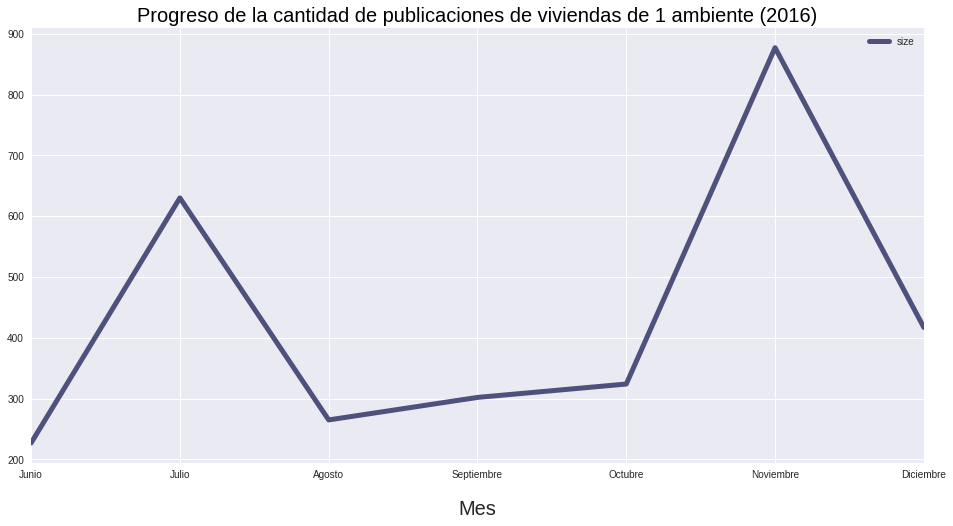

In [23]:
f=plt.figure()
ax=pev_1amb_2016.plot( y='size', figsize=(16,8), ax=f.gca(), linewidth=5.0, color='#4F517D')
ax.set_title('Progreso de la cantidad de publicaciones de viviendas de 1 ambiente (2016)',\
             color='black',size=20.0)
ax.set_xticklabels(['Junio','Julio', 'Agosto', 'Septiembre','Octubre', 'Noviembre', 'Diciembre'])
ax.set_xlabel('Mes',size=20.0,labelpad=20.0);
plt.show()


In [18]:
pev_1amb_2017 = \
    dataset_capital.loc[(~dataset_capital.property_type.str.contains('store')) & (dataset_capital.rooms==1) & (dataset_capital.anio == 2017), \
            ['mes', 'state_name']].groupby('mes').agg([np.size])
pev_1amb_2017 = pd.DataFrame(pev_1amb_2017.to_records())
pev_1amb_2017.columns=['mes','size']
pev_1amb_2017


,mes,size
0,1,503
1,2,746
2,3,919
3,4,1342
4,5,900
5,6,550


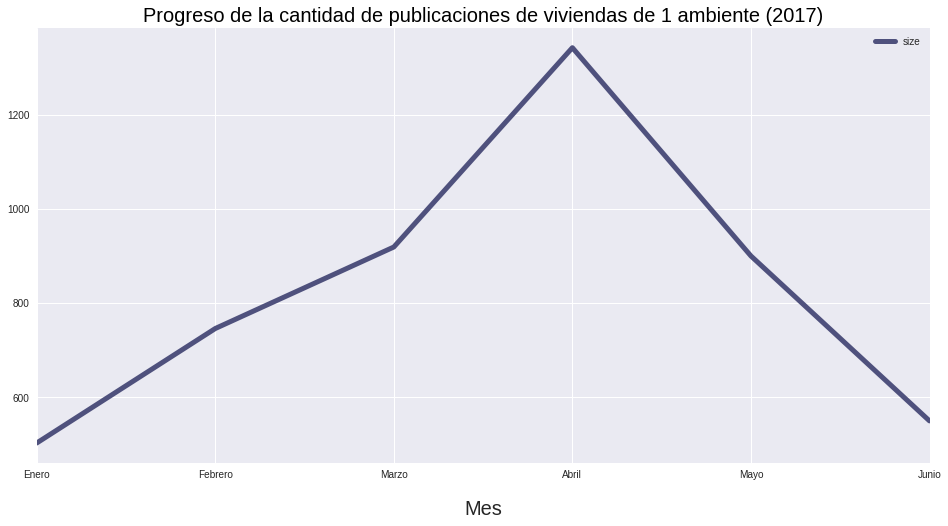

In [24]:
f=plt.figure()
ax=pev_1amb_2017.plot( y='size', figsize=(16,8), ax=f.gca(), linewidth=5.0, color='#4F517D')
ax.set_title('Progreso de la cantidad de publicaciones de viviendas de 1 ambiente (2017)',\
             color='black',size=20.0)
ax.set_xticklabels(['Enero','Febrero', 'Marzo', 'Abril','Mayo', 'Junio'])
ax.set_xlabel('Mes',size=20.0,labelpad=20.0);
plt.show()


## Evaluemos la cantidad de publicaciones según superficie

In [21]:
pev_sup_viviendas2 = \
    dataset_capital.loc[(~dataset_capital.property_type.str.contains('store')) & (dataset_capital.surface_covered_in_m2 < 101.0) & \
        (dataset_capital.surface_covered_in_m2 > 0) & (dataset_capital.anio == 2016),\
        ['surface_covered_in_m2', 'place_name', 'created_on']].groupby(['place_name', 'surface_covered_in_m2']).\
        agg([np.size])
pev_sup_viviendas2.dropna(inplace=True)
pev_sup_viviendas2.columns=['size']
pev_sup_viviendas2 = pd.DataFrame(pev_sup_viviendas.to_records())
pev_sup_viviendas2 = pd.pivot_table(pev_sup_viviendas2, values='surface_covered_in_m2', columns='size', index='place_name')
#popular_stations = pd.pivot_table(popular_stations,values='trips',columns='weekday',index='station')
#pev_sup_viviendas.head(10)

fig, ax = plt.subplots(figsize=(10,20))
ax = sns.heatmap(pev_sup_viviendas2)
#ax.set_xticklabels(['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])
ax.set_title("Popularidad de publicaciones por superficie", fontsize=15)
ax


KeyError: 'surface_covered_in_m2'

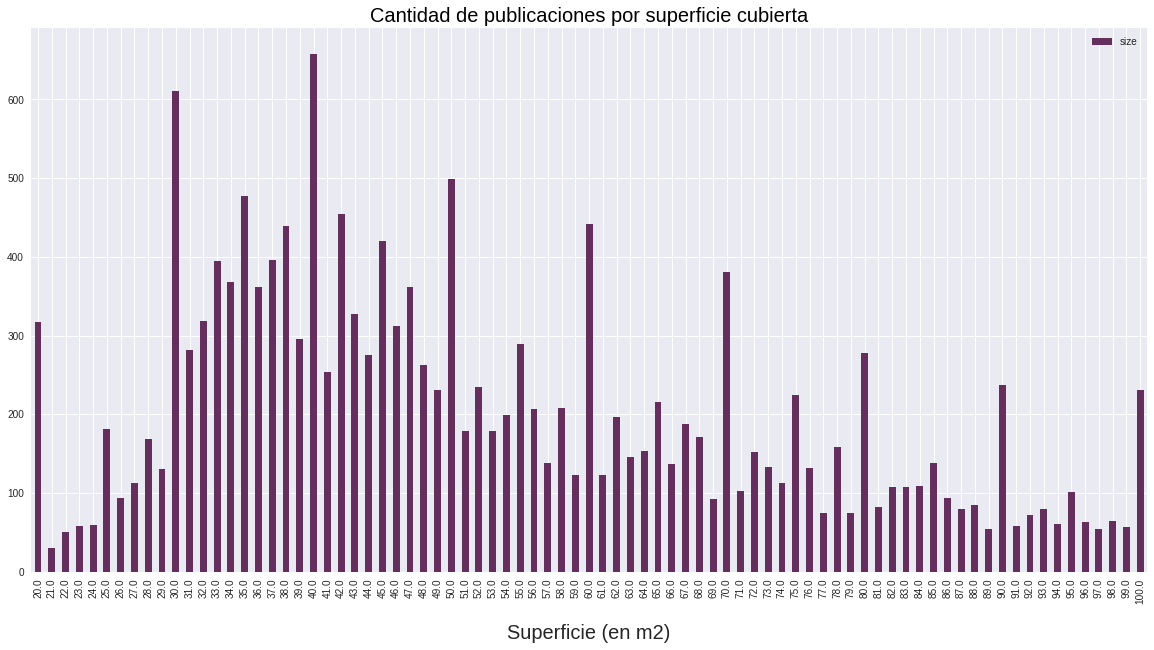

In [22]:
pev_sup_viviendas = \
    dataset_capital.loc[(~dataset_capital.property_type.str.contains('store')) & (dataset_capital.surface_covered_in_m2 < 101.0) & \
        (dataset_capital.surface_covered_in_m2 > 0) & (dataset_capital.anio == 2016),\
        ['surface_covered_in_m2', 'place_name']].groupby('surface_covered_in_m2').agg([np.size])
pev_sup_viviendas.columns=['size']
pev_sup_viviendas.dropna(inplace=True)



pev_sup_plot = pev_sup_viviendas.loc[ pev_sup_viviendas['size']>10 ,:]
f=plt.figure()
ax=pev_sup_plot.plot(kind='bar', figsize=(20,10), ax=f.gca(), linewidth=5.0, color='#642E5D')
ax.set_title('Cantidad de publicaciones por superficie cubierta',\
             color='black',size=20.0)
#ax.set_xticklabels(['Junio','Julio', 'Agosto', 'Septiembre','Octubre', 'Noviembre', 'Diciembre'])
ax.set_xlabel('Superficie (en m2)',size=20.0,labelpad=20.0);
plt.show()


Como podemos ver en este scatter plot, no se da una relación entre el precio por metro cuadrado (en dólares) y la superficie total. Esto tiene sentido, ya que el precio por metro cuadrado 

In [ ]:
# gráfico de area. lo dejo, después lo usamos o no. Como les parezca

ga = pd.DataFrame(data_2016.loc[:,['property_type', 'Mes']].groupby(['Mes', 'property_type']).size())
ga.columns=['size']
ga.reset_index(inplace=True)
pivoted = pd.pivot_table(ga, values='size', columns='property_type', index= 'Mes')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Titulo', color='black',size = 30)
ax = pivoted.plot(kind='area', stacked=True,figsize=(20,16),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)', size = 20);
ax.set_xlabel('Mes', size = 20);
ax.set_ylim(0,1)
plt.yticks(size = 20)
plt.xticks(size = 15)
plt.show()

Al estudiar la cantidad de publicaciones de tipo vivienda por cantidad de ambientes en lo que va del 2017 podemos ver que las publicaciones correspondientes a monoambientes son superadas únicamente por las publicaciones de viviendas de dos y tres ambientes.

Si evaluamos la evolución histórica entre el segundo semestre de 2016 y el primer semestre de 2017 podemos notar que para el año 2016 se presentaron dos picos: el primero de unos 600 inmuebles de un ambiente, y ya para Noviembre se registraron más de 900 monoambientes. En cuanto a 2017, en febrero se presenta un bajón importante en la cantidad de monoambientes publicados, pero ya para el mes de Abril la tendencia no solamente vuelve a crecer sino que alcanza un nuevo máximo local superando las 1200 publicaciones, para luego volver a caer.

Se puede ver una marcada actividad en el mercado de los monoambientes. No podemos inferir que ésta fluctuación se deba a la construcción de nuevas viviendas de un ambiente o a su venta, pero sí podemos asegurar que se trata de un mercado que está constantemente en movimiento.

Podemos ahondar aún más el análisis y si comparamos la cantidad de publicaciones por cada uno de estos semestres según la superficie cubierta, veremos que entre la segunda parte de 2016 y la primera de 2017 se dio un claro aumento total entre las publicaciones de 30 metros cuadrados o menos.

Con todo esto, podemos afirmar que la tendencia sigue vigente. Al menos según lo que podemos inferir por los inmuebles publicados en el dataset de properati, la cantidad de monoambientes y viviendas de 30 metros cuadrados o menos presentaron un aumento. ¿Tendencia o crisis habitacional?